In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [3]:
# reading the dataset
df = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(2)
pd.set_option("display.max_columns", None)

**Understanding the Dataset**

In [4]:
df.shape
df.info()
df.isnull().sum()
df = df.drop(columns= 'customerID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
Numerical_variable = ['TotalCharges','MonthlyCharges','tenure','SeniorCitizen']
for col in df.columns:
    if col not in Numerical_variable:
        print(col, df[col].unique())
        print('*'*50)

gender ['Female' 'Male']
**************************************************
Partner ['Yes' 'No']
**************************************************
Dependents ['No' 'Yes']
**************************************************
PhoneService ['No' 'Yes']
**************************************************
MultipleLines ['No phone service' 'No' 'Yes']
**************************************************
InternetService ['DSL' 'Fiber optic' 'No']
**************************************************
OnlineSecurity ['No' 'Yes' 'No internet service']
**************************************************
OnlineBackup ['Yes' 'No' 'No internet service']
**************************************************
DeviceProtection ['No' 'Yes' 'No internet service']
**************************************************
TechSupport ['No' 'Yes' 'No internet service']
**************************************************
StreamingTV ['No' 'Yes' 'No internet service']
**************************************************
StreamingM

In [6]:
df['TotalCharges']= df['TotalCharges'].replace({' ':'0.0'})

In [7]:
df['TotalCharges'] = df['TotalCharges'].astype(float) # Changing the dataset to float

** EDA **


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
def hist_plot(df,column_name):
    plt.figure(figsize=[7,5])
    sns.histplot(df[column_name],kde=True)
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    mean_line = plt.axvline(mean_value, color='red',linestyle= '-.', label='Mean')
    median_line = plt.axvline(median_value, color = 'Orange',linestyle= '--',label = 'Median')

    plt.legend([mean_line,median_line],['Mean','Median'])
    plt.title(f"Distribution of {column_name}")
    plt.show()

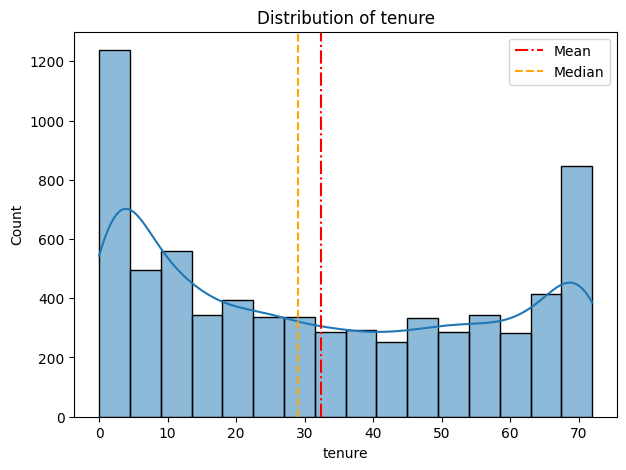

In [10]:
hist_plot(df,'tenure')


In [11]:
def box_plot(df,column_name):
    plt.figure(figsize=[7,5])
    sns.boxplot(df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

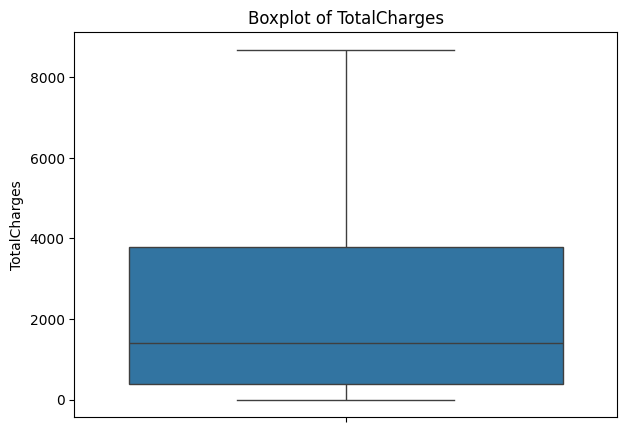

In [12]:
box_plot(df,'TotalCharges')

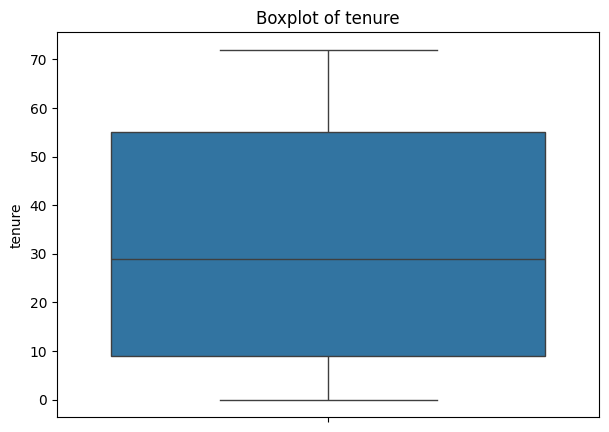

In [13]:
box_plot(df,'tenure')

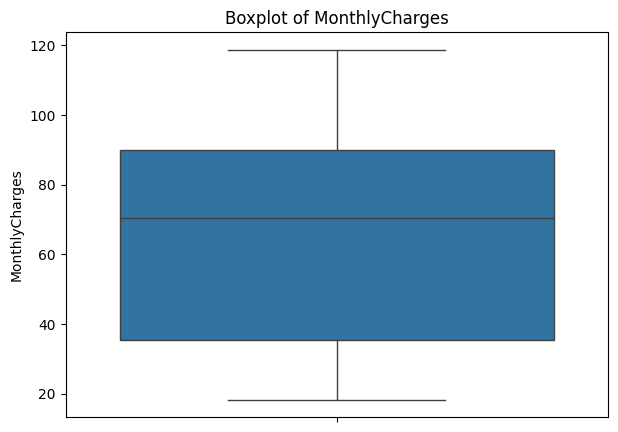

In [14]:
box_plot(df,'MonthlyCharges')

We are not gonna transform any  skewed data because it doesn't matter in treee based model. We should use Standard Scaler only for linear regression, Logistic regression, Lasso, etc. IT DOESN'T APPLY TO TARGET COLUMN, WE HAVE TO TRANFORM IF IT IS SKEWED DATA NOO MATTER THE MACHINE LEARNING MODEL WE USE

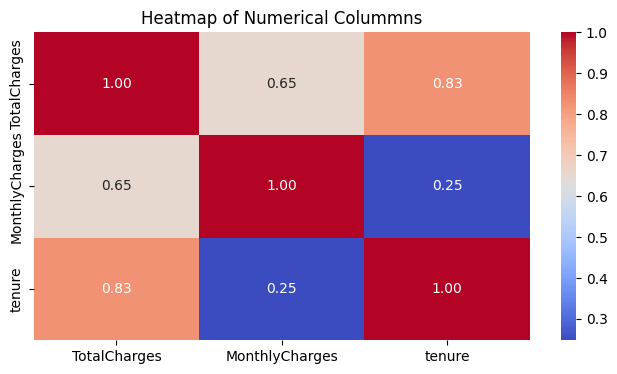

In [15]:
# Creating a eatmap to check if there is multicollinearity
plt.figure(figsize=[8,4])
sns.heatmap(df[['TotalCharges','MonthlyCharges','tenure']].corr(),annot= True,fmt='.2f',cmap= 'coolwarm')
plt.title(f"Heatmap of Numerical Colummns")
plt.show()

# As tenure and total charges are hhighly correlated we basically drop one column because of multicollinarity, Nut here we can irritate 2 times by dropping tenure one time and total charged one time

Categorical Column / Feature Analysis

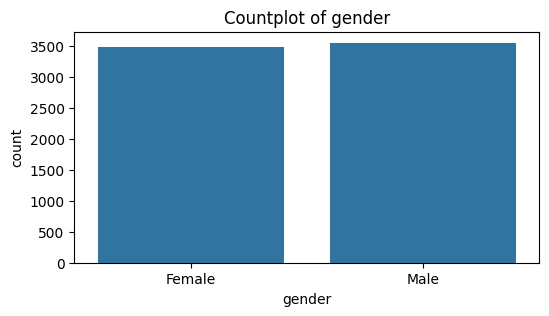

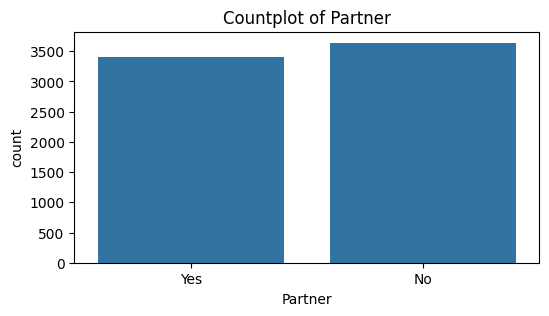

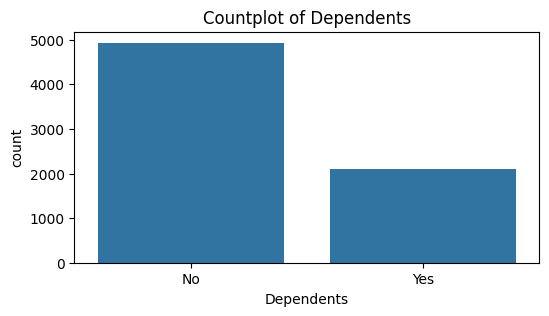

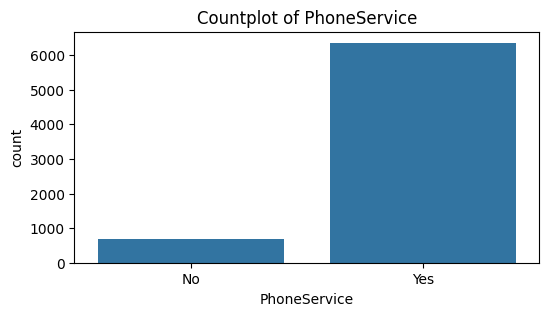

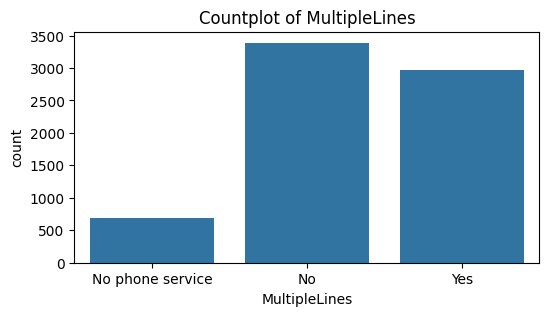

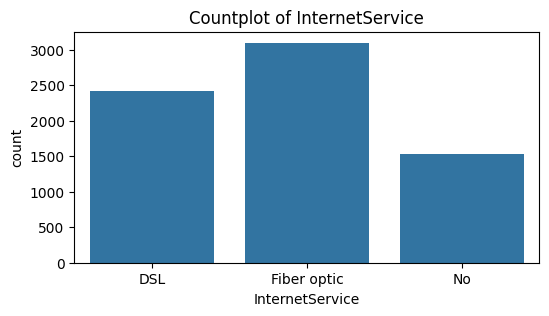

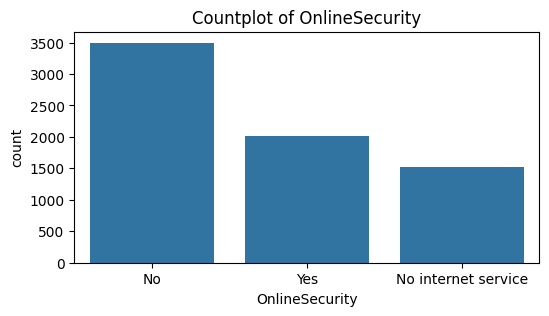

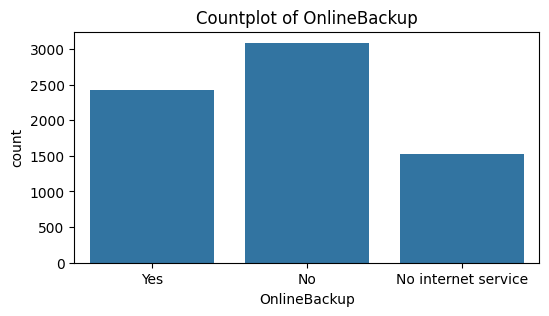

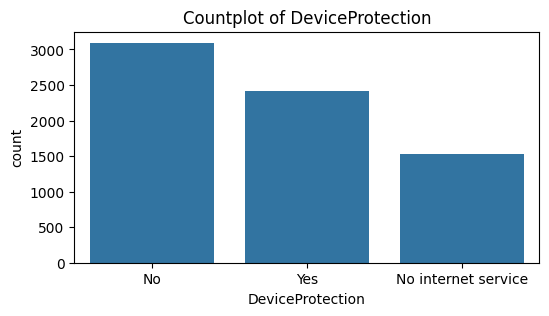

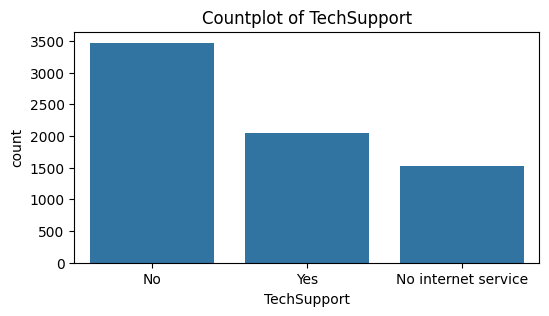

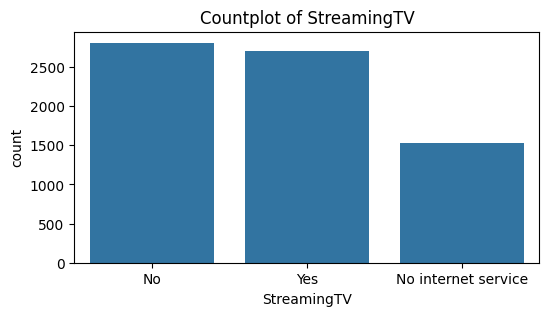

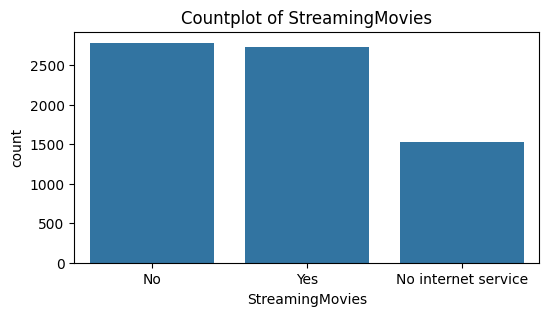

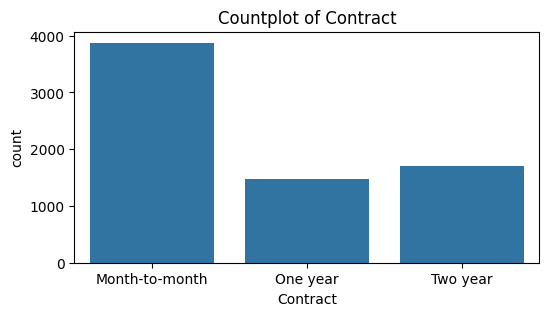

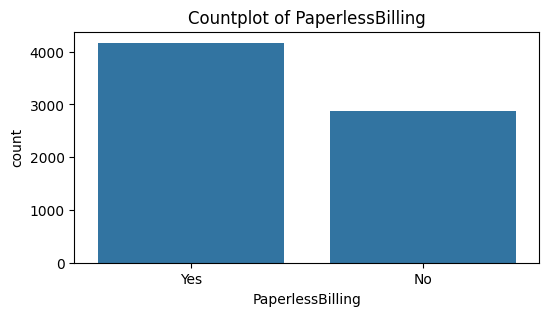

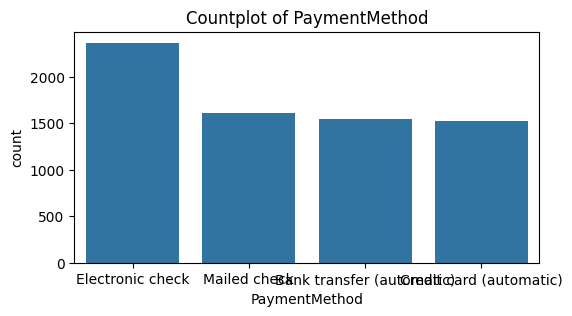

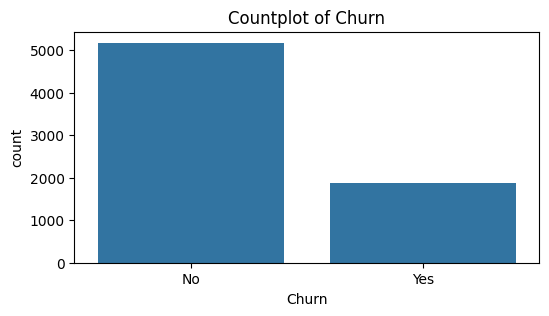

KeyError: 'SeniorCitizens'

<Figure size 600x300 with 0 Axes>

In [16]:
object_col = df.select_dtypes(include='object').columns.to_list()
object_col = object_col+['SeniorCitizens']
for col in object_col:
    plt.figure(figsize=[6,3])
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()

Data Preprcessing

In [17]:
df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})


object_column = df.select_dtypes(include='object').columns

for col in object_column:
    encode = LabelEncoder()
    df[col]= encode.fit_transform(df[col])




C:\Users\ashraf\AppData\Local\Temp\ipykernel_19376\1634978164.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})


In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**OverSampling**

In [19]:
x = df.drop('Churn',axis=1)
y = df['Churn']
smote = SMOTE(random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Smote Oversampling
xtrain_smote,ytrain_smote =smote.fit_resample(x_train,y_train)


In [20]:
models ={
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random forest': RandomForestClassifier(random_state=42),
    'XGBoost'      : XGBClassifier(random_state=42) }

In [21]:
cv={}

for model_items,model in models.items():
    score = cross_val_score(model,xtrain_smote,ytrain_smote,scoring='accuracy',cv=5)
    cv[model_items] = score
    print(f'{model_items} has a cross validation score of {np.mean(score)}')
    print('*'*50)

Decision Tree has a cross validation score of 0.7809448749945268
**************************************************
Random forest has a cross validation score of 0.8378577579286892
**************************************************
XGBoost has a cross validation score of 0.8312132025628676
**************************************************


In [22]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(xtrain_smote,ytrain_smote)


RandomForestClassifier(random_state=42)

In [23]:
y_pred = rfc.predict(x_test)

In [24]:
print(f'Accuracy Score is {accuracy_score(y_test, y_pred)}')
print(f'Classification report is {classification_report(y_test, y_pred)}')
print(f'{confusion_matrix(y_test, y_pred)}Confusion Matrix  ')

Accuracy Score is 0.7771469127040455
Classification report is               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

[[880 156]
 [158 215]]Confusion Matrix  


In [25]:
with open ('Customer_Churn_Model.pkl','wb') as f:
    pickle.dump(rfc,f)